In [1]:
import csv
import pandas as pd
import numpy as np
import requests
import json
import time
%matplotlib inline

In [3]:
# route_17 = pd.read_csv('route_17.csv', index_col=0)
# route_17

,date,scheduled_arrival_time,scheduled_departure_time,arrival_time,departure_time,service_num,location_name,location_code,latitude,longitude,next_stop_name,next_stop_code,next_lat,next_long,weather_cond,preci_mm,precip_in,humidity,punctuality
0,2019-7-3,2019-07-03 07:16:00,2019-07-03 07:16:00,2019-07-03 07:12:48,2019-07-03 07:16:42,17,Friar Street stop FN,39026100006,51.456805,-0.972627,Blagrave Street Stop EO,39028150002,51.457632,-0.970378,Partly cloudy,0.0,0.0,81,-192.0
1,2019-7-3,2019-07-03 07:17:00,2019-07-03 07:17:00,2019-07-03 07:17:12,2019-07-03 07:17:27,17,Blagrave Street Stop EO,39028150002,51.457632,-0.970378,Friar Street stop FP,39028170004,51.456718,-0.972960,Partly cloudy,0.0,0.0,81,12.0
2,2019-7-3,2019-07-03 07:20:00,2019-07-03 07:20:00,2019-07-03 07:18:35,2019-07-03 07:18:54,17,Kings Road Stop ME,39025920002,51.455018,-0.968723,Huntley and Palmers Stop 4,39026410004,51.455073,-0.961713,Partly cloudy,0.0,0.0,81,-85.0
3,2019-7-3,2019-07-03 07:22:00,2019-07-03 07:22:00,2019-07-03 07:20:41,2019-07-03 07:20:51,17,Huntley and Palmers Stop 4,39026410004,51.455073,-0.961713,Eldon Road opp,39025980002,51.453855,-0.957252,Partly cloudy,0.0,0.0,81,-79.0
4,2019-7-3,2019-07-03 07:23:00,2019-07-03 07:23:00,2019-07-03 07:21:32,2019-07-03 07:21:57,17,Eldon Road opp,39025980002,51.453855,-0.957252,Reading College adj,39027450002,51.453453,-0.953460,Partly cloudy,0.0,0.0,81,-88.0
5,2019-7-3,2019-07-03 07:24:00,2019-07-03 07:24:00,2019-07-03 07:22:24,2019-07-03 07:22:50,17,Reading College adj,39027450002,51.453453,-0.953460,Cemetery Junction Stop E1,39025480002,51.453147,-0.950345,Partly cloudy,0.0,0.0,81,-96.0
6,2019-7-3,2019-07-03 07:25:00,2019-07-03 07:25:00,2019-07-03 07:23:08,2019-07-03 07:23:25,17,Cemetery Junction Stop E1,39025480002,51.453147,-0.950345,Hamilton Road opp,39026240002,51.452358,-0.945743,Partly cloudy,0.0,0.0,81,-112.0
7,2019-7-3,2019-07-03 07:27:00,2019-07-03 07:27:00,2019-07-03 07:24:47,2019-07-03 07:24:54,17,Hamilton Road opp,39026240002,51.452358,-0.945743,College Road opp,39025690002,51.451490,-0.942107,Partly cloudy,0.0,0.0,81,-133.0
8,2019-7-3,2019-07-03 07:28:00,2019-07-03 07:28:00,2019-07-03 07:25:18,2019-07-03 07:25:27,17,College Road opp,39025690002,51.451490,-0.942107,Palmer Park Avenue adj,39026890002,51.449340,-0.938027,Partly cloudy,0.0,0.0,81,-162.0
9,2019-7-3,2019-07-03 07:29:00,2019-07-03 07:29:00,2019-07-03 07:27:05,2019-07-03 07:27:24,17,Palmer Park Avenue adj,39026890002,51.449340,-0.938027,St Peters Road adj,39027350002,51.447332,-0.935627,Partly cloudy,0.0,0.0,81,-115.0


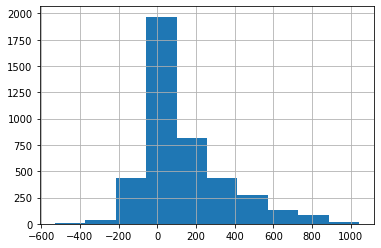

In [6]:
# route_17.punctuality.hist()

In [7]:
# route_17.describe()

,service_num,location_code,latitude,longitude,next_stop_code,next_lat,next_long,preci_mm,precip_in,humidity,punctuality
count,4204.0,4.204000e+03,4204.000000,4204.000000,4.204000e+03,4204.000000,4204.000000,4204.000000,4204.000000,4204.000000,4204.000000
mean,17.0,3.902646e+10,51.455430,-0.991525,3.902649e+10,51.455436,-0.991602,0.040618,0.001232,74.219791,132.913416
std,0.0,8.920081e+05,0.004282,0.036777,9.163532e+05,0.004313,0.036760,0.080280,0.003785,10.312820,218.957561
min,17.0,3.902515e+10,51.442710,-1.046845,3.902515e+10,51.442710,-1.046845,0.000000,0.000000,53.000000,-530.000000
25%,17.0,3.902558e+10,51.453453,-1.026740,3.902558e+10,51.453453,-1.026740,0.000000,0.000000,67.000000,-10.000000
50%,17.0,3.902652e+10,51.455765,-0.990455,3.902652e+10,51.455850,-0.990455,0.000000,0.000000,74.000000,62.000000
75%,17.0,3.902735e+10,51.458853,-0.960013,3.902735e+10,51.458853,-0.960013,0.070000,0.000000,82.000000,233.000000
max,17.0,3.902815e+10,51.461978,-0.931792,3.902817e+10,51.461978,-0.931792,0.530000,0.020000,94.000000,1044.000000


In [21]:
# route_17['punctuality'] = (pd.to_datetime(route_17['departure_time']) - pd.to_datetime(route_17['scheduled_departure_time'])).dt.total_seconds()


In [22]:
# route_17.punctuality.head()

0    42.0
1    27.0
2   -66.0
3   -69.0
4   -63.0
Name: punctuality, dtype: float64

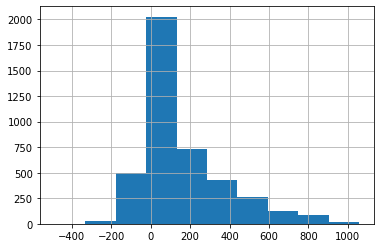

In [23]:
# route_17.punctuality.hist()

In [25]:
# route_17['scheduled_diff'] = (pd.to_datetime(route_17.scheduled_departure_time) - pd.to_datetime(route_17.scheduled_departure_time.shift(periods=1))).dt.total_seconds()


In [31]:
# route_17[route_17.scheduled_diff==0]

,date,scheduled_arrival_time,scheduled_departure_time,arrival_time,departure_time,service_num,location_name,location_code,latitude,longitude,...,next_lat,next_long,weather_cond,preci_mm,precip_in,humidity,punctuality,scheduled_diff,real_diff,time_ratio
2258,2019-7-6,2019-07-06 21:05:00,2019-07-06 21:05:00,2019-07-06 21:10:04,2019-07-06 21:10:36,17,Water Tower adj,39025160001,51.450905,-1.046845,...,51.45409,-1.046088,Light drizzle,0.13,0.01,94,336.0,0.0,45.0,inf


In [32]:
# route_17.iloc[2257:2259]

,date,scheduled_arrival_time,scheduled_departure_time,arrival_time,departure_time,service_num,location_name,location_code,latitude,longitude,...,next_lat,next_long,weather_cond,preci_mm,precip_in,humidity,punctuality,scheduled_diff,real_diff,time_ratio
2257,2019-7-6,2019-07-06 21:05:00,2019-07-06 21:05:00,2019-07-06 21:09:25,2019-07-06 21:09:51,17,Water Tower opp,39025160002,51.450777,-1.046705,...,51.450905,-1.046845,Light drizzle,0.13,0.01,94,291.0,60.0,65.0,1.083333
2258,2019-7-6,2019-07-06 21:05:00,2019-07-06 21:05:00,2019-07-06 21:10:04,2019-07-06 21:10:36,17,Water Tower adj,39025160001,51.450905,-1.046845,...,51.454090,-1.046088,Light drizzle,0.13,0.01,94,336.0,0.0,45.0,inf


In [27]:
# route_17['real_diff'] = (pd.to_datetime(route_17.departure_time) - pd.to_datetime(route_17.departure_time.shift(periods=1))).dt.total_seconds()


In [37]:
# route_17['time_ratio'] = (route_17.real_diff / route_17.scheduled_diff)

In [38]:
# route_17.loc[route_17.scheduled_diff==0, 'time_ratio'] = 1

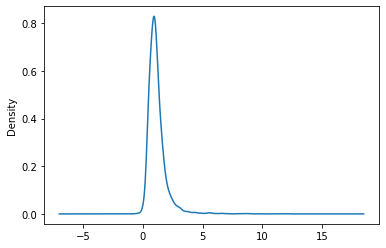

In [52]:
# route_17.time_ratio.plot(kind='kde')

In [55]:
# route_17.time_ratio.describe()

count    4203.000000
mean        1.163566
std         0.817663
min        -0.633333
25%         0.716667
50%         1.016667
75%         1.383333
max        12.100000
Name: time_ratio, dtype: float64

In [3]:
url = "https://rtl2.ods-live.co.uk//api/busstops?key=hvOtkiqAwK"
response = requests.get(url)
stop_list_data = response.json()

In [4]:
url = "https://rtl2.ods-live.co.uk//api/linePatterns?key=hvOtkiqAwK&service=17"
response = requests.get(url)
route_17_stops = response.json()

In [5]:
route_17_only = []

for i in range(3,10):
    url = "https://rtl2.ods-live.co.uk/api/trackingHistory?key=hvOtkiqAwK&service=17&date=2019-07-"+str(i)+"&vehicle=&location="
    response = requests.get(url)
    data = response.json()
    route_17_only.extend(data)

In [6]:
route_17_df = pd.DataFrame(route_17_only)
route_17_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60541 entries, 0 to 60540
Data columns (total 34 columns):
ActualHeadway             60541 non-null object
ArrivalStatus             60541 non-null object
ArrivalTime               60541 non-null object
DepartureStatus           60541 non-null object
DepartureTime             60541 non-null object
DepotCode                 60541 non-null object
Direction                 60541 non-null object
District                  60541 non-null object
DriverCode                60541 non-null object
Duty                      60541 non-null object
EndPoint                  60541 non-null object
JourneyCode               60541 non-null object
JourneyId                 60541 non-null object
JourneyPattern            60541 non-null object
JourneyType               60541 non-null object
Latitude                  60541 non-null object
LineRef                   60541 non-null object
LiveJourneyId             60541 non-null object
LocationCode              6

In [22]:
route_17_df_filter = route_17_df.loc[route_17_df.VehicleCode!='', :]

In [23]:
route_17_df_filter

,ActualHeadway,ArrivalStatus,ArrivalTime,DepartureStatus,DepartureTime,DepotCode,Direction,District,DriverCode,Duty,...,ScheduledArrivalTime,ScheduledDepartureTime,ScheduledHeadway,ScheduledStartTime,Sequence,ServiceGroup,Site,StartPoint,TimingPoint,VehicleCode
0,,H,2019-07-03 03:53:48,P,2019-07-03 04:00:09,RGB,Outbound,,630202,1004,...,2019-07-03 04:00:00,2019-07-03 04:00:00,,2019-07-03 04:00:00,1,Purple,RTL,Three Tuns opp,TimingPoint,710
1,,H,2019-07-03 04:00:32,P,2019-07-03 04:00:40,RGB,Outbound,,630202,1004,...,2019-07-03 04:00:30,2019-07-03 04:00:30,,2019-07-03 04:00:00,2,Purple,RTL,Three Tuns opp,NonTimingPoint,710
2,,H,2019-07-03 04:01:05,P,2019-07-03 04:01:13,RGB,Outbound,,630202,1004,...,2019-07-03 04:01:00,2019-07-03 04:01:00,,2019-07-03 04:00:00,3,Purple,RTL,Three Tuns opp,NonTimingPoint,710
3,,H,2019-07-03 04:01:28,P,2019-07-03 04:01:37,RGB,Outbound,,630202,1004,...,2019-07-03 04:02:00,2019-07-03 04:02:00,,2019-07-03 04:00:00,4,Purple,RTL,Three Tuns opp,NonTimingPoint,710
4,,H,2019-07-03 04:02:06,P,2019-07-03 04:02:14,RGB,Outbound,,630202,1004,...,2019-07-03 04:02:30,2019-07-03 04:02:30,,2019-07-03 04:00:00,5,Purple,RTL,Three Tuns opp,NonTimingPoint,710
5,,H,2019-07-03 04:02:28,P,2019-07-03 04:02:35,RGB,Outbound,,630202,1004,...,2019-07-03 04:03:00,2019-07-03 04:03:00,,2019-07-03 04:00:00,6,Purple,RTL,Three Tuns opp,NonTimingPoint,710
6,,H,2019-07-03 04:03:25,P,2019-07-03 04:03:32,RGB,Outbound,,630202,1004,...,2019-07-03 04:04:00,2019-07-03 04:04:00,,2019-07-03 04:00:00,7,Purple,RTL,Three Tuns opp,NonTimingPoint,710
7,,H,2019-07-03 04:03:52,P,2019-07-03 04:03:59,RGB,Outbound,,630202,1004,...,2019-07-03 04:05:00,2019-07-03 04:05:00,,2019-07-03 04:00:00,8,Purple,RTL,Three Tuns opp,NonTimingPoint,710
8,,H,2019-07-03 04:04:41,P,2019-07-03 04:04:51,RGB,Outbound,,630202,1004,...,2019-07-03 04:06:00,2019-07-03 04:06:00,,2019-07-03 04:00:00,9,Purple,RTL,Three Tuns opp,NonTimingPoint,710
9,,H,2019-07-03 04:05:49,P,2019-07-03 04:05:57,RGB,Outbound,,630202,1004,...,2019-07-03 04:07:00,2019-07-03 04:07:00,,2019-07-03 04:00:00,10,Purple,RTL,Three Tuns opp,NonTimingPoint,710


In [7]:
route_17_stops_df = pd.DataFrame(route_17_stops)

In [49]:
route_17_stops_df.head()

,direction,display_order,location_code,location_name,operator_code,route_code
0,0,2000,039027540001,Three Tuns opp,RGB,17
1,0,3000,039026660001,Melrose Avenue Adj,RGB,17
2,0,4000,039027350001,St Peters Road opp,RGB,17
3,0,5000,039026890001,Palmer Park Avenue Opp,RGB,17
4,0,6000,039025690001,College Road adj,RGB,17


In [9]:
route_17_merged = route_17_df.merge(route_17_stops_df, left_on='LocationCode', right_on='location_code').sort_values(['VehicleCode','ScheduledDepartureTime'])
route_17_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60541 entries, 31881 to 48814
Data columns (total 40 columns):
ActualHeadway             60541 non-null object
ArrivalStatus             60541 non-null object
ArrivalTime               60541 non-null object
DepartureStatus           60541 non-null object
DepartureTime             60541 non-null object
DepotCode                 60541 non-null object
Direction                 60541 non-null object
District                  60541 non-null object
DriverCode                60541 non-null object
Duty                      60541 non-null object
EndPoint                  60541 non-null object
JourneyCode               60541 non-null object
JourneyId                 60541 non-null object
JourneyPattern            60541 non-null object
JourneyType               60541 non-null object
Latitude                  60541 non-null object
LineRef                   60541 non-null object
LiveJourneyId             60541 non-null object
LocationCode           

In [10]:
route_17_merged.head()

,ActualHeadway,ArrivalStatus,ArrivalTime,DepartureStatus,DepartureTime,DepotCode,Direction,District,DriverCode,Duty,...,Site,StartPoint,TimingPoint,VehicleCode,direction,display_order,location_code,location_name,operator_code,route_code
31881,,,,,,RGB,Inbound,,,1004,...,RTL,Water Tower adj,NonTimingPoint,,1,3000,039025630002,City Road adj 94,RGB,17
10802,,,,,,RGB,Outbound,Reading,,1020,...,RTL,St Marys Butts stop CN,TimingPoint,,0,14000,039027320002,St Marys Butts stop CN,RGB,17
30982,,,,,,RGB,Inbound,,,1004,...,RTL,Water Tower adj,TimingPoint,,1,2000,039025160001,Water Tower adj,RGB,17
27323,,,,,,RGB,Outbound,,,1020,...,RTL,St Marys Butts stop CN,NonTimingPoint,,0,32000,039025510002,Chapel Hill opp,RGB,17
10810,,,,,,RGB,Outbound,Reading,,1002,...,RTL,St Marys Butts stop CN,TimingPoint,,0,14000,039027320002,St Marys Butts stop CN,RGB,17


In [11]:
for col_name in [c for c in route_17_merged.columns if c.endswith('Time')]:
    route_17_merged[col_name] = pd.to_datetime(route_17_merged[col_name])

In [101]:
segments = []
for k, df_g in route_17_merged.groupby('VehicleCode'):
    if k!= '':
        temp_df_g = df_g.copy().sort_values(by='ScheduledDepartureTime')
        temp_df_g_shifted = temp_df_g.shift(1)
        changes_direction = (temp_df_g.direction.astype(np.float) - temp_df_g_shifted.direction.astype(np.float)).abs()
        temp_df_g['punctuality'] = (pd.to_datetime(temp_df_g['DepartureTime']) - pd.to_datetime(temp_df_g['ScheduledDepartureTime'])).dt.total_seconds()
        temp_df_g['route_idx'] = changes_direction.cumsum().fillna(0)
        segments.append(temp_df_g)
route_17_df_extra = pd.concat(segments).reset_index(drop=True)

In [103]:
route_17_df_extra[['VehicleCode','ScheduledDepartureTime', 'LocationName', 'direction','route_idx']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56306 entries, 0 to 56305
Data columns (total 5 columns):
VehicleCode               56306 non-null object
ScheduledDepartureTime    56306 non-null datetime64[ns]
LocationName              56306 non-null object
direction                 56306 non-null object
route_idx                 56306 non-null float64
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 2.1+ MB


In [104]:
segments_2 = []
for k, df_g in route_17_df_extra.groupby(['VehicleCode', 'route_idx']):
    temp_df_g = df_g.copy().sort_values(by='ScheduledDepartureTime')
    temp_df_g_shifted = temp_df_g.shift(1)
    temp_df_g['scheduled_diff'] = (temp_df_g.ScheduledDepartureTime - temp_df_g_shifted.ScheduledDepartureTime).dt.total_seconds()
    temp_df_g['real_diff'] = (temp_df_g.DepartureTime - temp_df_g_shifted.DepartureTime).dt.total_seconds()
    temp_df_g['time_ratio'] = (temp_df_g.real_diff / temp_df_g.scheduled_diff)
    temp_df_g.loc[temp_df_g.scheduled_diff==0, 'time_ratio'] = 1
    temp_df_g['prev_stop_delay'] = temp_df_g_shifted.punctuality
    segments_2.append(temp_df_g)
route_17_df_extra_2 = pd.concat(segments_2).reset_index(drop=True)
                                

In [105]:
route_17_df_extra_2[['VehicleCode', 'ScheduledDepartureTime', 'LocationName', 'route_idx', 'scheduled_diff', 'real_diff', 'punctuality', 'time_ratio']].head(100)

,VehicleCode,ScheduledDepartureTime,LocationName,route_idx,scheduled_diff,real_diff,punctuality,time_ratio
0,520,2019-07-08 15:10:00,St Marys Butts stop CN,0.0,NaN,NaN,16.0,NaN
1,520,2019-07-08 15:15:00,Cheapside Stop CW,0.0,300.0,361.0,77.0,1.203333
2,520,2019-07-08 15:16:00,Waylen Street Adj,0.0,60.0,44.0,61.0,0.733333
3,520,2019-07-08 15:18:00,George Street opp,0.0,120.0,86.0,27.0,0.716667
4,520,2019-07-08 15:20:00,Reading West Rail Station - Oxford Road adj,0.0,120.0,65.0,-28.0,0.541667
5,520,2019-07-08 15:21:00,Beresford Road opp,0.0,60.0,58.0,-30.0,0.966667
6,520,2019-07-08 15:22:00,West Village - Tesco opp,0.0,60.0,56.0,-34.0,0.933333
7,520,2019-07-08 15:23:00,Wantage Road adj,0.0,60.0,53.0,-41.0,0.883333
8,520,2019-07-08 15:24:00,Brock Gardens Adj,0.0,60.0,51.0,-50.0,0.850000
9,520,2019-07-08 15:26:00,Pond House Opp,0.0,120.0,239.0,69.0,1.991667


In [95]:
route_17_df_extra_2.loc[route_17_df_extra_2.VehicleCode=='']

,ActualHeadway,ArrivalStatus,ArrivalTime,DepartureStatus,DepartureTime,DepotCode,Direction,District,DriverCode,Duty,...,location_code,location_name,operator_code,route_code,punctuality,route_idx,scheduled_diff,real_diff,time_ratio,prev_stop_delay


for every row, generate a column that tells how late the bus was on the next stop

In [106]:
route_17_df_extra_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56306 entries, 0 to 56305
Data columns (total 46 columns):
ActualHeadway             56306 non-null object
ArrivalStatus             56306 non-null object
ArrivalTime               56306 non-null datetime64[ns]
DepartureStatus           56306 non-null object
DepartureTime             56306 non-null datetime64[ns]
DepotCode                 56306 non-null object
Direction                 56306 non-null object
District                  56306 non-null object
DriverCode                56306 non-null object
Duty                      56306 non-null object
EndPoint                  56306 non-null object
JourneyCode               56306 non-null object
JourneyId                 56306 non-null object
JourneyPattern            56306 non-null object
JourneyType               56306 non-null object
Latitude                  56306 non-null object
LineRef                   56306 non-null object
LiveJourneyId             56306 non-null object
LocationCod

In [67]:
route_17_df_extra_2[['VehicleCode', 'ScheduledDepartureTime', 'DepartureTime', 'LocationName', 'LocationCode', 
                     'direction', 'route_idx', 'real_diff', 'scheduled_diff', 'punctuality', 
                     'prev_stop_delay']]

,VehicleCode,ScheduledDepartureTime,DepartureTime,LocationName,LocationCode,direction,route_idx,real_diff,scheduled_diff,punctuality,prev_stop_delay
0,520,2019-07-08 15:15:00,2019-07-08 15:16:17,Cheapside Stop CW,039025530003,0,0.0,NaN,NaN,77.0,NaN
1,520,2019-07-08 15:16:00,2019-07-08 15:17:01,Waylen Street Adj,039027710002,0,0.0,44.0,60.0,61.0,77.0
2,520,2019-07-08 15:18:00,2019-07-08 15:18:27,George Street opp,039026130001,0,0.0,86.0,120.0,27.0,61.0
3,520,2019-07-08 15:20:00,2019-07-08 15:19:32,Reading West Rail Station - Oxford Road adj,039027070002,0,0.0,65.0,120.0,-28.0,27.0
4,520,2019-07-08 15:21:00,2019-07-08 15:20:30,Beresford Road opp,039025190001,0,0.0,58.0,60.0,-30.0,-28.0
5,520,2019-07-08 15:22:00,2019-07-08 15:21:26,West Village - Tesco opp,039025150001,0,0.0,56.0,60.0,-34.0,-30.0
6,520,2019-07-08 15:23:00,2019-07-08 15:22:19,Wantage Road adj,039027660001,0,0.0,53.0,60.0,-41.0,-34.0
7,520,2019-07-08 15:24:00,2019-07-08 15:23:10,Brock Gardens Adj,039025330001,0,0.0,51.0,60.0,-50.0,-41.0
8,520,2019-07-08 15:26:00,2019-07-08 15:27:09,Pond House Opp,039026960002,0,0.0,239.0,120.0,69.0,-50.0
9,520,2019-07-08 15:28:00,2019-07-08 15:28:30,Norcot Junction NW-bound,039026790002,0,0.0,81.0,120.0,30.0,69.0


In [108]:
segments_3 = []
for k, df_g in route_17_df_extra_2.groupby(['LocationCode']):
    temp_df_g = df_g.copy().sort_values(by='ScheduledDepartureTime')
    mean = temp_df_g.real_diff.mean()
    temp_df_g['avg_time_from_prev'] = mean
    segments_3.append(temp_df_g)
route_17_df_extra_3 = pd.concat(segments_3).sort_values(by=['VehicleCode', 
                        'ScheduledDepartureTime']).reset_index(drop=True)

In [109]:
route_17_df_extra_3[['VehicleCode', 'ScheduledDepartureTime', 'DepartureTime', 'LocationName', 'LocationCode', 
                     'direction', 'route_idx', 'real_diff', 'scheduled_diff', 'punctuality', 
                     'prev_stop_delay', 'avg_time_from_prev']].head(70)

,VehicleCode,ScheduledDepartureTime,DepartureTime,LocationName,LocationCode,direction,route_idx,real_diff,scheduled_diff,punctuality,prev_stop_delay,avg_time_from_prev
0,520,2019-07-08 15:10:00,2019-07-08 15:10:16,St Marys Butts stop CN,039027320002,0,0.0,NaN,NaN,16.0,NaN,1322.904157
1,520,2019-07-08 15:15:00,2019-07-08 15:16:17,Cheapside Stop CW,039025530003,0,0.0,361.0,300.0,77.0,16.0,226.353418
2,520,2019-07-08 15:16:00,2019-07-08 15:17:01,Waylen Street Adj,039027710002,0,0.0,44.0,60.0,61.0,77.0,70.979381
3,520,2019-07-08 15:18:00,2019-07-08 15:18:27,George Street opp,039026130001,0,0.0,86.0,120.0,27.0,61.0,103.355064
4,520,2019-07-08 15:20:00,2019-07-08 15:19:32,Reading West Rail Station - Oxford Road adj,039027070002,0,0.0,65.0,120.0,-28.0,27.0,70.844807
5,520,2019-07-08 15:21:00,2019-07-08 15:20:30,Beresford Road opp,039025190001,0,0.0,58.0,60.0,-30.0,-28.0,75.152425
6,520,2019-07-08 15:22:00,2019-07-08 15:21:26,West Village - Tesco opp,039025150001,0,0.0,56.0,60.0,-34.0,-30.0,71.738979
7,520,2019-07-08 15:23:00,2019-07-08 15:22:19,Wantage Road adj,039027660001,0,0.0,53.0,60.0,-41.0,-34.0,52.708772
8,520,2019-07-08 15:24:00,2019-07-08 15:23:10,Brock Gardens Adj,039025330001,0,0.0,51.0,60.0,-50.0,-41.0,45.353828
9,520,2019-07-08 15:26:00,2019-07-08 15:27:09,Pond House Opp,039026960002,0,0.0,239.0,120.0,69.0,-50.0,93.860492


In [110]:
route_17_df_extra_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56306 entries, 0 to 56305
Data columns (total 47 columns):
ActualHeadway             56306 non-null object
ArrivalStatus             56306 non-null object
ArrivalTime               56306 non-null datetime64[ns]
DepartureStatus           56306 non-null object
DepartureTime             56306 non-null datetime64[ns]
DepotCode                 56306 non-null object
Direction                 56306 non-null object
District                  56306 non-null object
DriverCode                56306 non-null object
Duty                      56306 non-null object
EndPoint                  56306 non-null object
JourneyCode               56306 non-null object
JourneyId                 56306 non-null object
JourneyPattern            56306 non-null object
JourneyType               56306 non-null object
Latitude                  56306 non-null object
LineRef                   56306 non-null object
LiveJourneyId             56306 non-null object
LocationCod

In [111]:
route_17_df_extra_3.to_csv(path_or_buf='./route_17_data_3-10.csv')

In [174]:
# changes_direction.sum()

2798.0

In [71]:
# route_17_all = []

# for i in range(3,10):
#     url = "https://rtl2.ods-live.co.uk/api/trackingHistory?key=hvOtkiqAwK&service=17&date=2019-07-"+str(i)+"&vehicle=&location="
#     response = requests.get(url)
#     data = response.json()
#     day = []
#     for track in data:
#         if track["ArrivalTime"] != "":
#             arrival_time = time.strptime(track["ScheduledArrivalTime"], "%Y-%m-%d %H:%M:%S")
#             date = str(arrival_time.tm_year)+"-"+str(arrival_time.tm_mon)+"-"+str(arrival_time.tm_mday)
            
# #             weather_cond = weather[arrival_time.tm_mday][arrival_time.tm_hour][0]
# #             precip_mm = weather[arrival_time.tm_mday][arrival_time.tm_hour][1]
# #             precip_in = weather[arrival_time.tm_mday][arrival_time.tm_hour][2]
# #             humidity = weather[arrival_time.tm_mday][arrival_time.tm_hour][3]
                    
#             stop = [obj for obj in stop_list_data if obj['location_code']==track["LocationCode"]][0]
#             lat = stop['latitude']
#             long = stop['longitude']     
            
#             stop_ind = [i for i, obj in enumerate(route_17_stops) if obj['location_code']==track["LocationCode"]][0]
#             next_stop = route_17_stops[(stop_ind+1)%len(route_17_stops)]
#             next_stop_name = next_stop['location_name']
#             next_stop_code = next_stop['location_code']
#             next_stop_from_list = [obj for obj in stop_list_data if obj['location_code']==next_stop_code][0]
#             next_lat = next_stop_from_list['latitude']
#             next_long = next_stop_from_list['longitude']
            
# #             from_address = str(lat)+','+str(long)
# #             to_address = str(next_lat)+','+str(next_long)
# #             normal_time = WazeRouteCalculator.WazeRouteCalculator(from_address, to_address, 'EU', log_lvl=None).calc_route_info()[0]
            
# #             real_arrival = time.strptime(track["ArrivalTime"], "%Y-%m-%d %H:%M:%S")

#             punctuality = (pd.to_datetime(track['DepartureTime']) - pd.to_datetime(track['ScheduledDepartureTime'])).total_seconds()
    
#             row = [date, track["VehicleCode"], pd.to_datetime(track["ScheduledArrivalTime"]), pd.to_datetime(track["ScheduledDepartureTime"]), 
#                    pd.to_datetime(track["ArrivalTime"]), pd.to_datetime(track["DepartureTime"]), track["LineRef"], track["LocationName"], 
#                    track["LocationCode"], lat, long, next_stop_name, next_stop_code, next_lat, next_long,
#                     punctuality]
#             route_17_all.append(row)

In [74]:
# header = ["date", "vehicle_code", "scheduled_arrival_time", "scheduled_departure_time", "arrival_time", "departure_time"
#          , "service_num", "location_name", "location_code", "latitude", "longitude", "next_stop_name", 
#           "next_stop_code", "next_lat", "next_long", "punctuality"]

In [97]:
# route_17_df = pd.DataFrame(route_17_all, columns=header)
# route_17_df.head()

,date,vehicle_code,scheduled_arrival_time,scheduled_departure_time,arrival_time,departure_time,service_num,location_name,location_code,latitude,longitude,next_stop_name,next_stop_code,next_lat,next_long,punctuality
0,2019-7-3,710,2019-07-03 04:00:00,2019-07-03 04:00:00,2019-07-03 03:53:48,2019-07-03 04:00:09,17,Three Tuns opp,039027540001,51.443093,-0.932445,Melrose Avenue Adj,039026660001,51.445598,-0.934027,9.0
1,2019-7-3,710,2019-07-03 04:00:30,2019-07-03 04:00:30,2019-07-03 04:00:32,2019-07-03 04:00:40,17,Melrose Avenue Adj,039026660001,51.445598,-0.934027,St Peters Road opp,039027350001,51.448168,-0.936702,10.0
2,2019-7-3,710,2019-07-03 04:01:00,2019-07-03 04:01:00,2019-07-03 04:01:05,2019-07-03 04:01:13,17,St Peters Road opp,039027350001,51.448168,-0.936702,Palmer Park Avenue Opp,039026890001,51.449598,-0.938783,13.0
3,2019-7-3,710,2019-07-03 04:02:00,2019-07-03 04:02:00,2019-07-03 04:01:28,2019-07-03 04:01:37,17,Palmer Park Avenue Opp,039026890001,51.449598,-0.938783,College Road adj,039025690001,51.451800,-0.943583,-23.0
4,2019-7-3,710,2019-07-03 04:02:30,2019-07-03 04:02:30,2019-07-03 04:02:06,2019-07-03 04:02:14,17,College Road adj,039025690001,51.451800,-0.943583,Hamilton Road adj,039026240001,51.452515,-0.947107,-16.0


In [76]:
# route_17_df.groupby('vehicle_code')['scheduled_diff'] = (route_17_df.scheduled_departure_time - route_17_df.scheduled_departure_time.shift(periods=1)).dt.total_seconds()

In [140]:
# segments = []
# for k, df_g in route_17_merged.groupby('vehicle_code'):
#     temp_df_g = df_g.copy().sort_values(by='scheduled_departure_time')
#     temp_df_g['scheduled_diff'] = (temp_df_g.scheduled_departure_time - temp_df_g.scheduled_departure_time.shift(periods=1)).dt.total_seconds()
#     #temp_df_g['real_diff'] = (temp_df_g.departure_time - temp_df_g.departure_time.shift(periods=1)).dt.total_seconds()
#     temp_df_g['time_ratio'] = (temp_df_g.punctuality / temp_df_g.scheduled_diff)
#     temp_df_g.loc[temp_df_g.scheduled_diff==0, 'time_ratio'] = 1
#     segments.append(temp_df_g)
# route_17_df_extra = pd.concat(segments).reset_index(drop=True)

In [141]:
# route_17_df_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56306 entries, 0 to 56305
Data columns (total 18 columns):
date                        56306 non-null object
vehicle_code                56306 non-null object
scheduled_arrival_time      56306 non-null datetime64[ns]
scheduled_departure_time    56306 non-null datetime64[ns]
arrival_time                56306 non-null datetime64[ns]
departure_time              56306 non-null datetime64[ns]
service_num                 56306 non-null object
location_name               56306 non-null object
location_code               56306 non-null object
latitude                    56306 non-null object
longitude                   56306 non-null object
next_stop_name              56306 non-null object
next_stop_code              56306 non-null object
next_lat                    56306 non-null object
next_long                   56306 non-null object
punctuality                 56306 non-null float64
scheduled_diff              56285 non-null float64
time_ra

In [142]:
# route_17_df_extra.scheduled_diff.describe()

count     56285.000000
mean        162.812828
std        2495.663937
min           0.000000
25%          60.000000
50%          60.000000
75%          60.000000
max      337560.000000
Name: scheduled_diff, dtype: float64

In [143]:
# route_17_df_extra.head()

,date,vehicle_code,scheduled_arrival_time,scheduled_departure_time,arrival_time,departure_time,service_num,location_name,location_code,latitude,longitude,next_stop_name,next_stop_code,next_lat,next_long,punctuality,scheduled_diff,time_ratio
0,2019-7-8,520,2019-07-08 15:10:00,2019-07-08 15:10:00,2019-07-08 15:07:27,2019-07-08 15:10:16,17,St Marys Butts stop CN,039027320002,51.454240,-0.974427,Cheapside Stop CW,039025530003,51.455267,-0.976490,16.0,NaN,NaN
1,2019-7-8,520,2019-07-08 15:12:00,2019-07-08 15:15:00,2019-07-08 15:12:12,2019-07-08 15:16:17,17,Cheapside Stop CW,039025530003,51.455267,-0.976490,Waylen Street Adj,039027710002,51.454922,-0.981305,77.0,300.0,0.256667
2,2019-7-8,520,2019-07-08 15:16:00,2019-07-08 15:16:00,2019-07-08 15:17:01,2019-07-08 15:17:01,17,Waylen Street Adj,039027710002,51.454922,-0.981305,George Street opp,039026130001,51.455455,-0.986920,61.0,60.0,1.016667
3,2019-7-8,520,2019-07-08 15:18:00,2019-07-08 15:18:00,2019-07-08 15:18:27,2019-07-08 15:18:27,17,George Street opp,039026130001,51.455455,-0.986920,Reading West Rail Station - Oxford Road adj,039027070002,51.455765,-0.990455,27.0,120.0,0.225000
4,2019-7-8,520,2019-07-08 15:20:00,2019-07-08 15:20:00,2019-07-08 15:19:31,2019-07-08 15:19:32,17,Reading West Rail Station - Oxford Road adj,039027070002,51.455765,-0.990455,Beresford Road opp,039025190001,51.456432,-0.994858,-28.0,120.0,-0.233333


In [144]:
# route_17_df_extra.time_ratio.describe()

count    56285.000000
mean         3.475103
std          5.060506
min         -7.233333
25%          0.300000
50%          1.693333
75%          4.833333
max         59.550000
Name: time_ratio, dtype: float64

In [145]:
# route_17_df_extra.loc[route_17_df_extra.vehicle_code == '710', 'time_ratio'].describe()

count    3443.000000
mean        3.963183
std         5.509246
min        -4.533333
25%         0.300000
50%         2.000000
75%         6.066667
max        50.200000
Name: time_ratio, dtype: float64

In [146]:
# route_17_df_extra.loc[route_17_df_extra.vehicle_code == '706', 'time_ratio'].describe()

count    364.000000
mean       5.652009
std        9.481835
min       -3.133333
25%       -0.035417
50%        0.916667
75%        8.320833
max       45.933333
Name: time_ratio, dtype: float64

In [147]:
# route_17_df_extra.groupby(['location_name', 'next_stop_name']).agg({'time_ratio':'mean', 'punctuality':'mean'}).sort_values(by='time_ratio',ascending=False)

,,time_ratio,punctuality
location_name,next_stop_name,,
Chapel Hill opp,Mayfair adj 21,7.663449,221.071084
Tilehurst Triangle Stop W,Chapel Hill opp,6.672668,205.500589
Cemetery Junction W-bound,Reading College opp,5.863056,338.732080
Minster Street stop MM,St Marys Butts stop CN,5.554414,340.015187
Hamilton Road adj,Cemetery Junction W-bound,5.511514,290.035800
College Road adj,Hamilton Road adj,5.437356,304.248804
Huntley and Palmers Stop 1,Kings Road Stop MG,5.381237,329.655131
Kings Road Stop MG,Minster Street stop MM,5.370899,332.458629
St Peters Road adj,Melrose Avenue Opp,5.143373,314.391095


In [130]:
# route_17_df_extra[(route_17_df_extra.location_name=='Three Tuns opp') & (route_17_df_extra.next_stop_name=='Melrose Avenue Adj')]

,date,vehicle_code,scheduled_arrival_time,scheduled_departure_time,arrival_time,departure_time,service_num,location_name,location_code,latitude,longitude,next_stop_name,next_stop_code,next_lat,next_long,punctuality,scheduled_diff,real_diff,time_ratio
122,2019-7-8,520,2019-07-08 18:10:00,2019-07-08 18:10:00,2019-07-08 18:09:59,2019-07-08 18:09:59,17,Three Tuns opp,039027540001,51.443093,-0.932445,Melrose Avenue Adj,039026660001,51.445598,-0.934027,-1.0,420.0,125.0,0.297619
189,2019-7-8,520,2019-07-08 19:45:00,2019-07-08 19:45:00,2019-07-08 19:43:30,2019-07-08 19:45:16,17,Three Tuns opp,039027540001,51.443093,-0.932445,Melrose Avenue Adj,039026660001,51.445598,-0.934027,16.0,300.0,211.0,0.703333
235,2019-7-4,705,2019-07-04 16:26:00,2019-07-04 16:26:00,2019-07-04 16:25:21,2019-07-04 16:26:02,17,Three Tuns opp,039027540001,51.443093,-0.932445,Melrose Avenue Adj,039026660001,51.445598,-0.934027,2.0,240.0,33.0,0.137500
302,2019-7-4,705,2019-07-04 18:10:00,2019-07-04 18:10:00,2019-07-04 18:08:30,2019-07-04 18:09:53,17,Three Tuns opp,039027540001,51.443093,-0.932445,Melrose Avenue Adj,039026660001,51.445598,-0.934027,-7.0,420.0,104.0,0.247619
369,2019-7-4,705,2019-07-04 19:45:00,2019-07-04 19:45:00,2019-07-04 19:46:49,2019-07-04 19:46:49,17,Three Tuns opp,039027540001,51.443093,-0.932445,Melrose Avenue Adj,039026660001,51.445598,-0.934027,109.0,300.0,27.0,0.090000
408,2019-7-7,706,2019-07-07 15:00:00,2019-07-07 15:00:00,2019-07-07 15:03:20,2019-07-07 15:03:54,17,Three Tuns opp,039027540001,51.443093,-0.932445,Melrose Avenue Adj,039026660001,51.445598,-0.934027,234.0,240.0,45.0,0.187500
468,2019-7-7,706,2019-07-07 16:40:00,2019-07-07 16:40:00,2019-07-07 16:39:04,2019-07-07 16:40:17,17,Three Tuns opp,039027540001,51.443093,-0.932445,Melrose Avenue Adj,039026660001,51.445598,-0.934027,17.0,240.0,100.0,0.416667
533,2019-7-7,706,2019-07-07 18:12:00,2019-07-07 18:12:00,2019-07-07 18:24:25,2019-07-07 18:24:45,17,Three Tuns opp,039027540001,51.443093,-0.932445,Melrose Avenue Adj,039026660001,51.445598,-0.934027,765.0,120.0,31.0,0.258333
620,2019-7-7,706,2019-07-07 20:52:00,2019-07-07 20:52:00,2019-07-07 20:51:05,2019-07-07 20:52:30,17,Three Tuns opp,039027540001,51.443093,-0.932445,Melrose Avenue Adj,039026660001,51.445598,-0.934027,30.0,120.0,128.0,1.066667
681,2019-7-7,706,2019-07-07 22:12:00,2019-07-07 22:12:00,2019-07-07 22:10:54,2019-07-07 22:13:37,17,Three Tuns opp,039027540001,51.443093,-0.932445,Melrose Avenue Adj,039026660001,51.445598,-0.934027,97.0,120.0,217.0,1.808333


In [117]:
# route_17_df_extra[route_17_df_extra.index.isin({46168,46169})]

,date,vehicle_code,scheduled_arrival_time,scheduled_departure_time,arrival_time,departure_time,service_num,location_name,location_code,latitude,longitude,next_stop_name,next_stop_code,next_lat,next_long,punctuality,scheduled_diff,real_diff,time_ratio
46169,2019-7-8,520,2019-07-08 19:45:00,2019-07-08 19:45:00,2019-07-08 19:43:30,2019-07-08 19:45:16,17,Three Tuns opp,039027540001,51.443093,-0.932445,Melrose Avenue Adj,039026660001,51.445598,-0.934027,16.0,300.0,211.0,0.703333
46168,2019-7-8,718,2019-07-08 20:20:00,2019-07-08 20:20:00,2019-07-08 20:17:01,2019-07-08 20:20:00,17,Water Tower opp,039025160002,51.450777,-1.046705,Water Tower adj,039025160001,51.450905,-1.046845,0.0,60.0,197.0,3.283333


In [131]:
# route_17_df_extra.iloc[121:123]

,date,vehicle_code,scheduled_arrival_time,scheduled_departure_time,arrival_time,departure_time,service_num,location_name,location_code,latitude,longitude,next_stop_name,next_stop_code,next_lat,next_long,punctuality,scheduled_diff,real_diff,time_ratio
121,2019-7-8,520,2019-07-08 18:03:00,2019-07-08 18:03:00,2019-07-08 18:06:41,2019-07-08 18:07:54,17,Three Tuns Adj,039027540002,51.442710,-0.931792,Three Tuns opp,039027540001,51.443093,-0.932445,294.0,120.0,112.0,0.933333
122,2019-7-8,520,2019-07-08 18:10:00,2019-07-08 18:10:00,2019-07-08 18:09:59,2019-07-08 18:09:59,17,Three Tuns opp,039027540001,51.443093,-0.932445,Melrose Avenue Adj,039026660001,51.445598,-0.934027,-1.0,420.0,125.0,0.297619


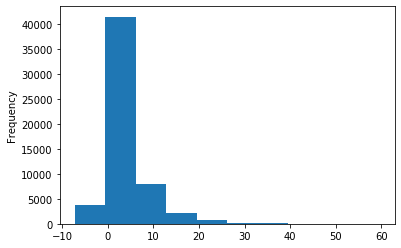

In [148]:
# route_17_df_extra.time_ratio.plot(kind='hist')